# Trevor Maxwell
## Follow-Up Treatment Prediction - Modeling
### d20230804

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import f1_score, recall_score
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [2]:
# import dataset from previous milestone

patient_df = pd.read_csv('data-ori_cleaned.csv')

# preview dataframe
patient_df.head()

,haematocrit,haemoglobins,erythrocyte,leucocyte,thrombocyte,mch,mchc,mcv,age,source,sex_m
0,41.5,13.3,4.83,2.9,217,27.5,32.0,85.9,18,out,0
1,38.9,12.8,4.66,7.7,362,27.5,32.9,83.5,18,out,0
2,38.9,12.6,4.83,9.7,307,26.1,32.4,80.5,18,out,0
3,36.9,12.5,4.16,3.1,207,30.0,33.9,88.7,18,out,0
4,37.2,12.3,4.18,8.3,306,29.4,33.1,89.0,18,out,0


In [3]:
# transform target variable "source"
# create dummies
source_dummies = pd.get_dummies(patient_df['source'], prefix = 'source')

# add dummies to dataframe
patient_df['source_in'] = source_dummies['source_in']

# drop original sex column
patient_df1 = patient_df.drop(columns = ['source'], axis = 1)

In [4]:
# preview dataframe after source variable transformation

patient_df1.head()

,haematocrit,haemoglobins,erythrocyte,leucocyte,thrombocyte,mch,mchc,mcv,age,sex_m,source_in
0,41.5,13.3,4.83,2.9,217,27.5,32.0,85.9,18,0,0
1,38.9,12.8,4.66,7.7,362,27.5,32.9,83.5,18,0,0
2,38.9,12.6,4.83,9.7,307,26.1,32.4,80.5,18,0,0
3,36.9,12.5,4.16,3.1,207,30.0,33.9,88.7,18,0,0
4,37.2,12.3,4.18,8.3,306,29.4,33.1,89.0,18,0,0


In [5]:
# Randomly split the data into 80% training data and 20% test data, where the target is "source_in".

# create features dataframe
X = patient_df1.drop(columns = ['source_in'], axis = 1)

# create target dataframe
y = patient_df1['source_in']

# use train_test_split to split into traning and test for the features and the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# create dictionary that will become dataframe for each models statistics
model_stats_dict = {'model':[], 'accuracy':[], 'precision':[], 'f1_score':[], 'recall_score':[]}

# create dictionary for models used in analysis
models = {'Logistic Regression'      : LogisticRegression(),
          'Random Forest Classifier' : RandomForestClassifier(),
          'Decision Tree'            : DecisionTreeClassifier(),
          'KN Neighbors Classifier'  : KNeighborsClassifier()}

# loop through each model, fit the training set and run test set through model, obtain stats
for key, value in models.items():
    
    # create model and fit to training set
    model = value
    fit_model = model.fit(X_train, y_train)
    
    # run X_test through model
    y_preds = fit_model.predict(X_test)

    # obtain accuracy from sklearn.metrics
    accuracy = accuracy_score(y_test, y_preds)
    print(f'{key} Accuracy: {(accuracy * 100):.2f}%')

    # obtain precision from sklearn.metrics
    precision = precision_score(y_test, y_preds)
    print(f'{key} Precision: {(precision * 100):.2f}%')

    # obtain f1_score from sklearn.metrics
    f1 = f1_score(y_test, y_preds)
    print(f'{key} F1 Score: {f1}')

    # obtain r-squared from sklearn.metrics
    recall = recall_score(y_test, y_preds)
    print(f'{key} Recall Score: {recall}\n')

    # append stats to dictionary
    model_stats_dict['model'].append(key)
    model_stats_dict['accuracy'].append(accuracy)
    model_stats_dict['precision'].append(precision)
    model_stats_dict['f1_score'].append(f1)
    model_stats_dict['recall_score'].append(recall)
    
    # append model stats to dataframe
    model_stats_df = pd.DataFrame(model_stats_dict)

C:\Users\trevo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 72.83%
Logistic Regression Precision: 70.08%
Logistic Regression F1 Score: 0.6129032258064516
Logistic Regression Recall Score: 0.5445859872611465

Random Forest Classifier Accuracy: 74.97%
Random Forest Classifier Precision: 70.46%
Random Forest Classifier F1 Score: 0.6655462184873949
Random Forest Classifier Recall Score: 0.6305732484076433

Decision Tree Accuracy: 68.43%
Decision Tree Precision: 59.63%
Decision Tree F1 Score: 0.608424336973479
Decision Tree Recall Score: 0.6210191082802548

KN Neighbors Classifier Accuracy: 69.31%
KN Neighbors Classifier Precision: 62.07%
KN Neighbors Classifier F1 Score: 0.5960264900662251
KN Neighbors Classifier Recall Score: 0.5732484076433121



In [7]:
# view stats dataframe
model_stats_df

,model,accuracy,precision,f1_score,recall_score
0,Logistic Regression,0.728302,0.700820,0.612903,0.544586
1,Random Forest Classifier,0.749686,0.704626,0.665546,0.630573
2,Decision Tree,0.684277,0.596330,0.608424,0.621019
3,KN Neighbors Classifier,0.693082,0.620690,0.596026,0.573248


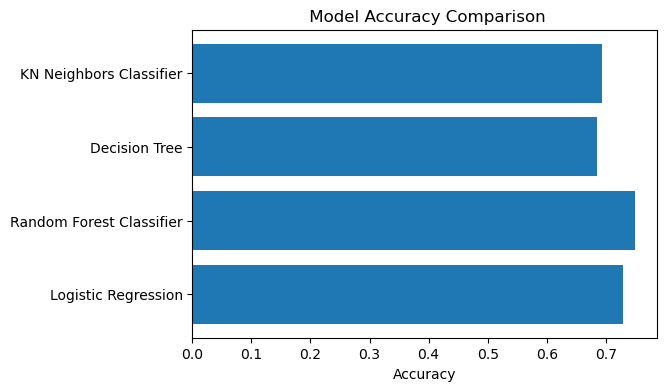

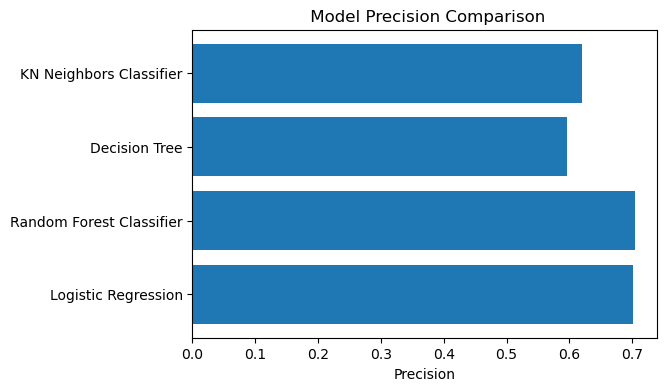

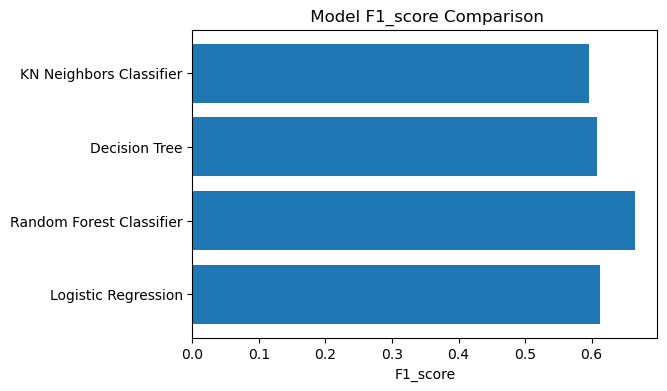

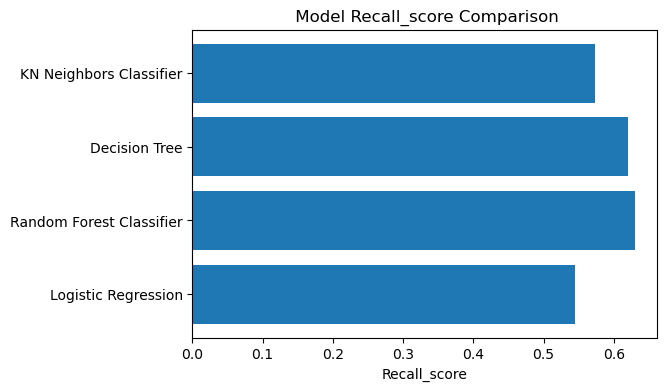

In [8]:
# drop model from dataset only keep numeric columns for loop
model_stats_df_1 = model_stats_df.drop(columns = ['model'], axis = 1)

# loop through each score and create a bar chart to compare the stats for each model
for column in model_stats_df_1.columns:
    
    # size figure
    plt.figure(figsize = (6, 4))
    
    # create horizontal bar chart
    plt.barh(model_stats_df['model'], model_stats_df_1[str(column)])
    
    # create labels and title
    plt.xlabel(str(column).capitalize())
    plt.title(f' Model {str(column).capitalize()} Comparison')
    
    # create value at end of bar chart
#     for index, value in enumerate(model_stats_df_1[str(column)]):
#         plt.text(value, index, str(round(value, 4)))
        
    # show visual
    plt.show()

### Conclusion

Only classification models were fit to the dataset to predict if the patient's next treatment should be inpatient or outpatient. Of all the models performed on the dataset, the best performing model was the Random Forest Classifier. This is mainly based of the F1 score rather than the Accuracy score. The target in the dataset is about 60% outpatient visits and 40% inpatient visits. Therefore, the model could pick outpatient only, and the Accuracy score would still be 60%. Since the target variable in the dataset is imbalanced, F1 score is a better measurement to use to determine which model fits best. 